In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

In [2]:
zoo = pd.read_csv('../Dataset/zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [4]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


## Visualize the data

<Axes: >

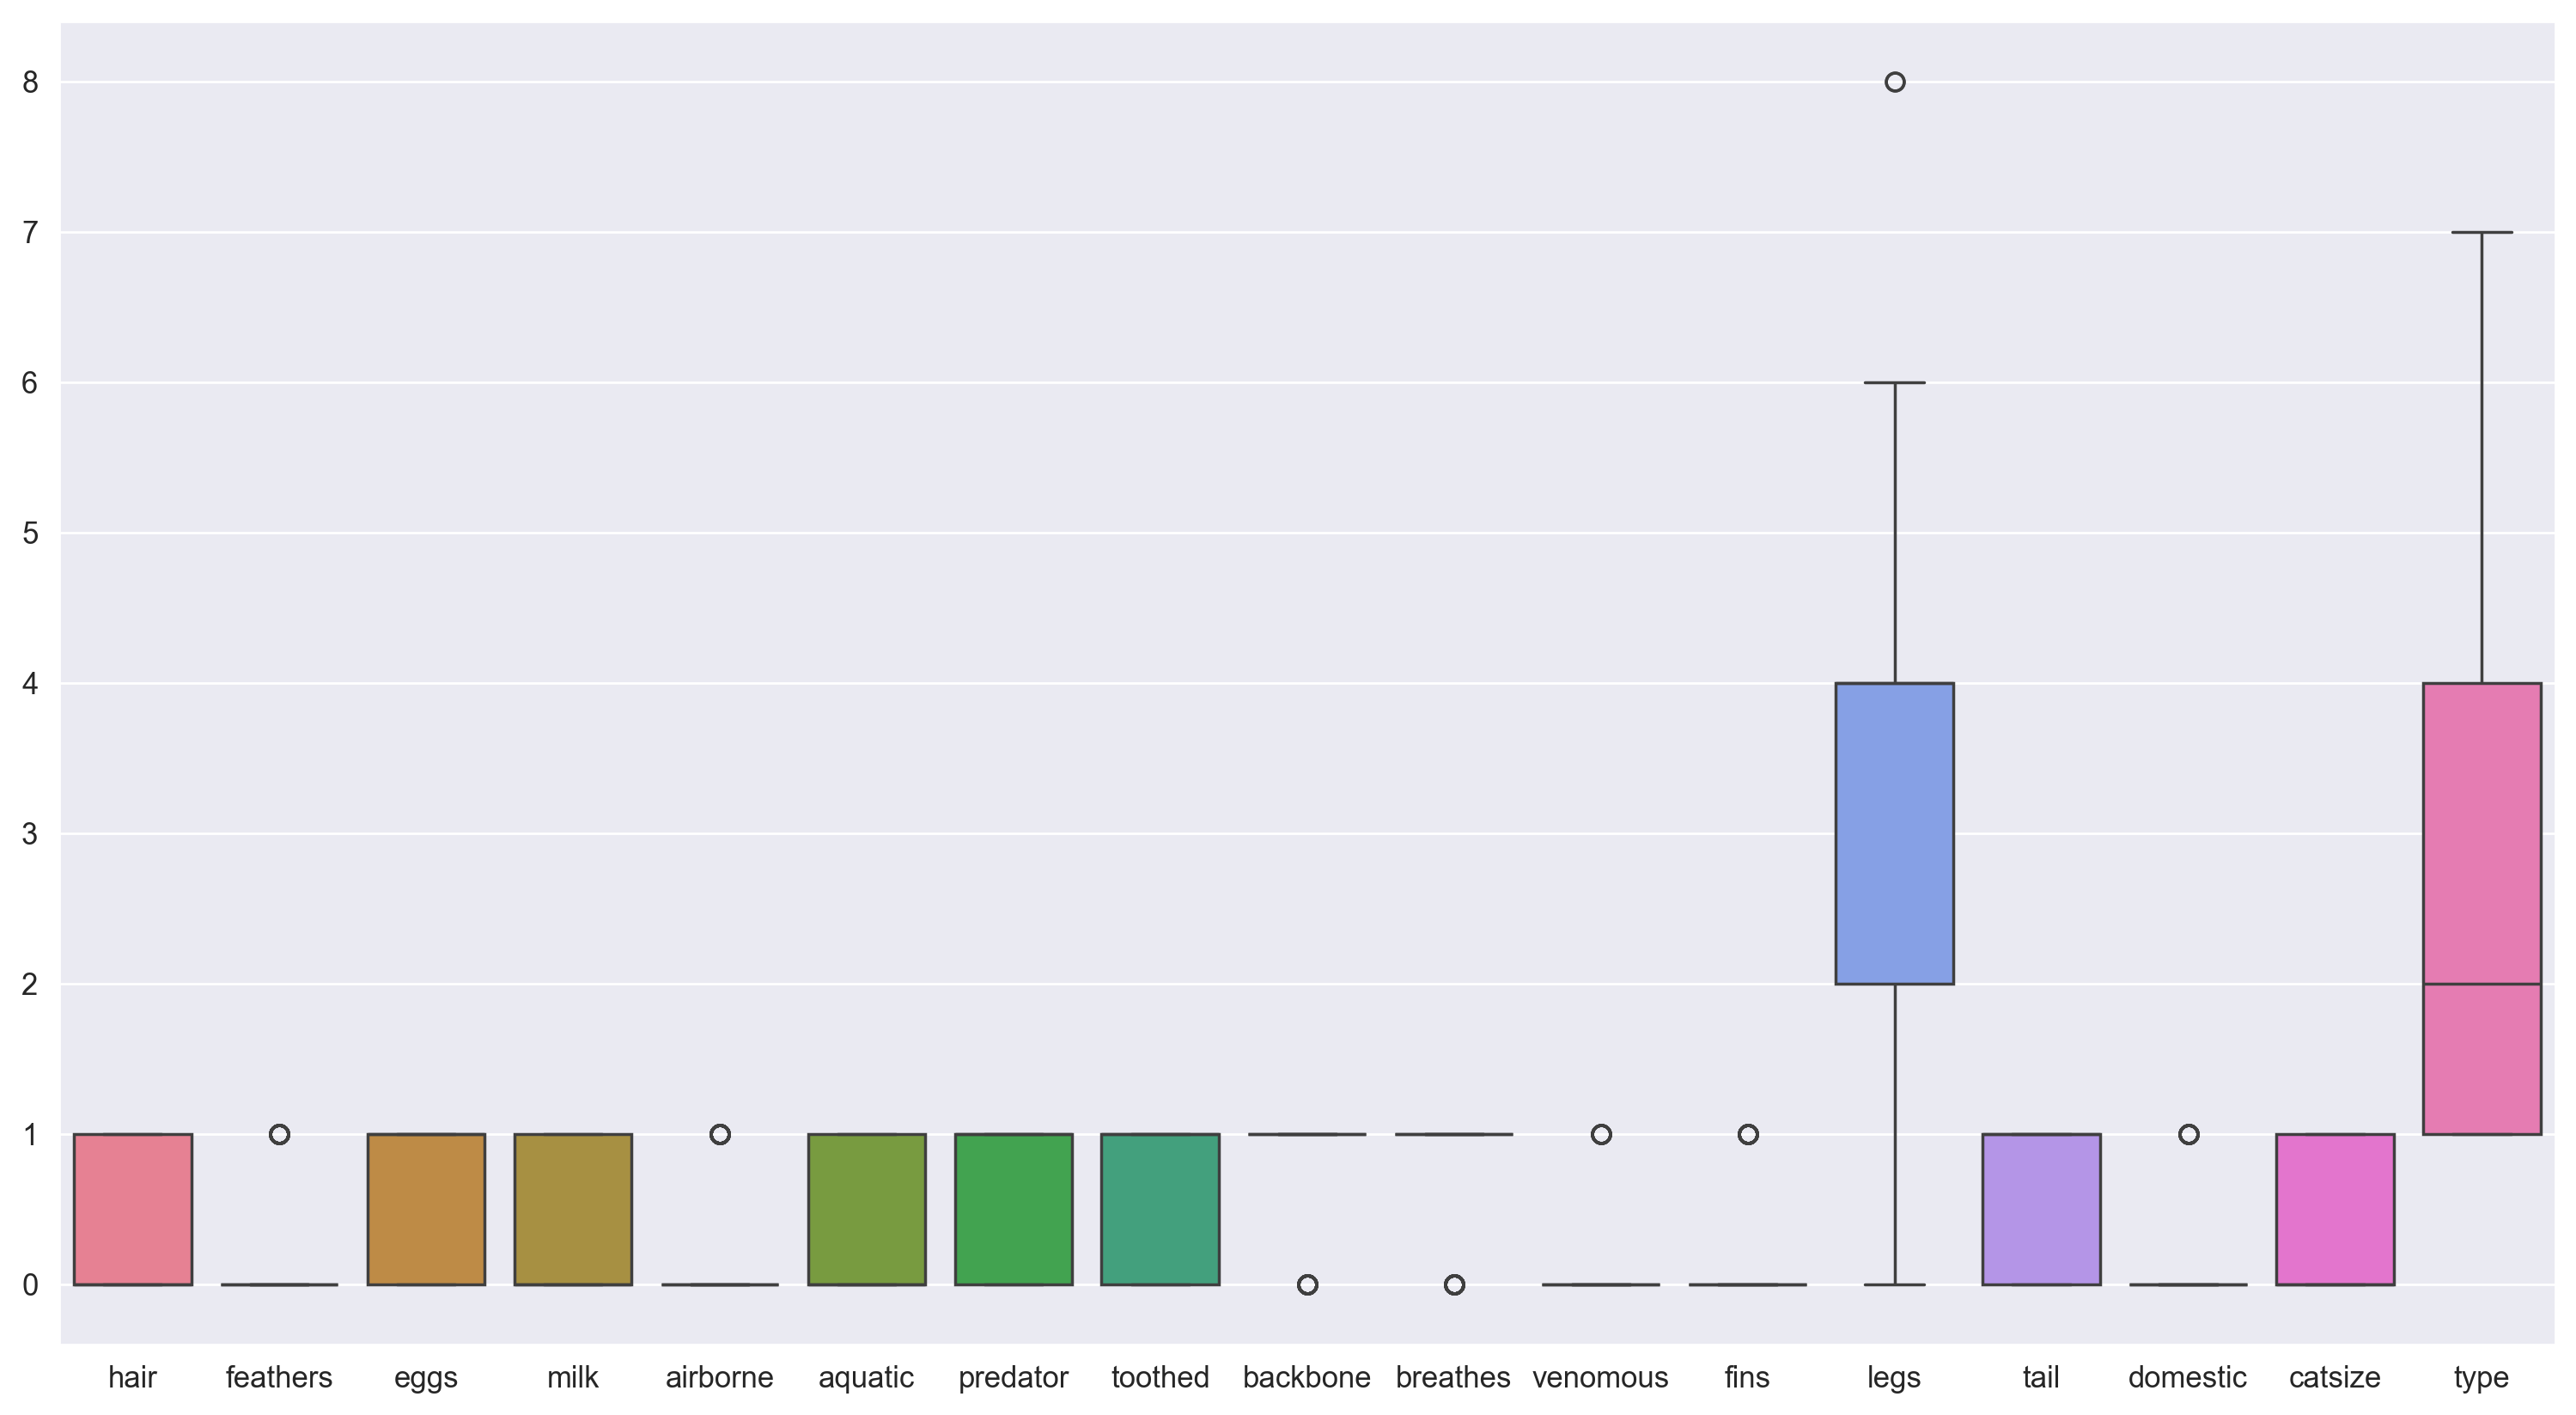

In [7]:
sns.boxplot(data= zoo)

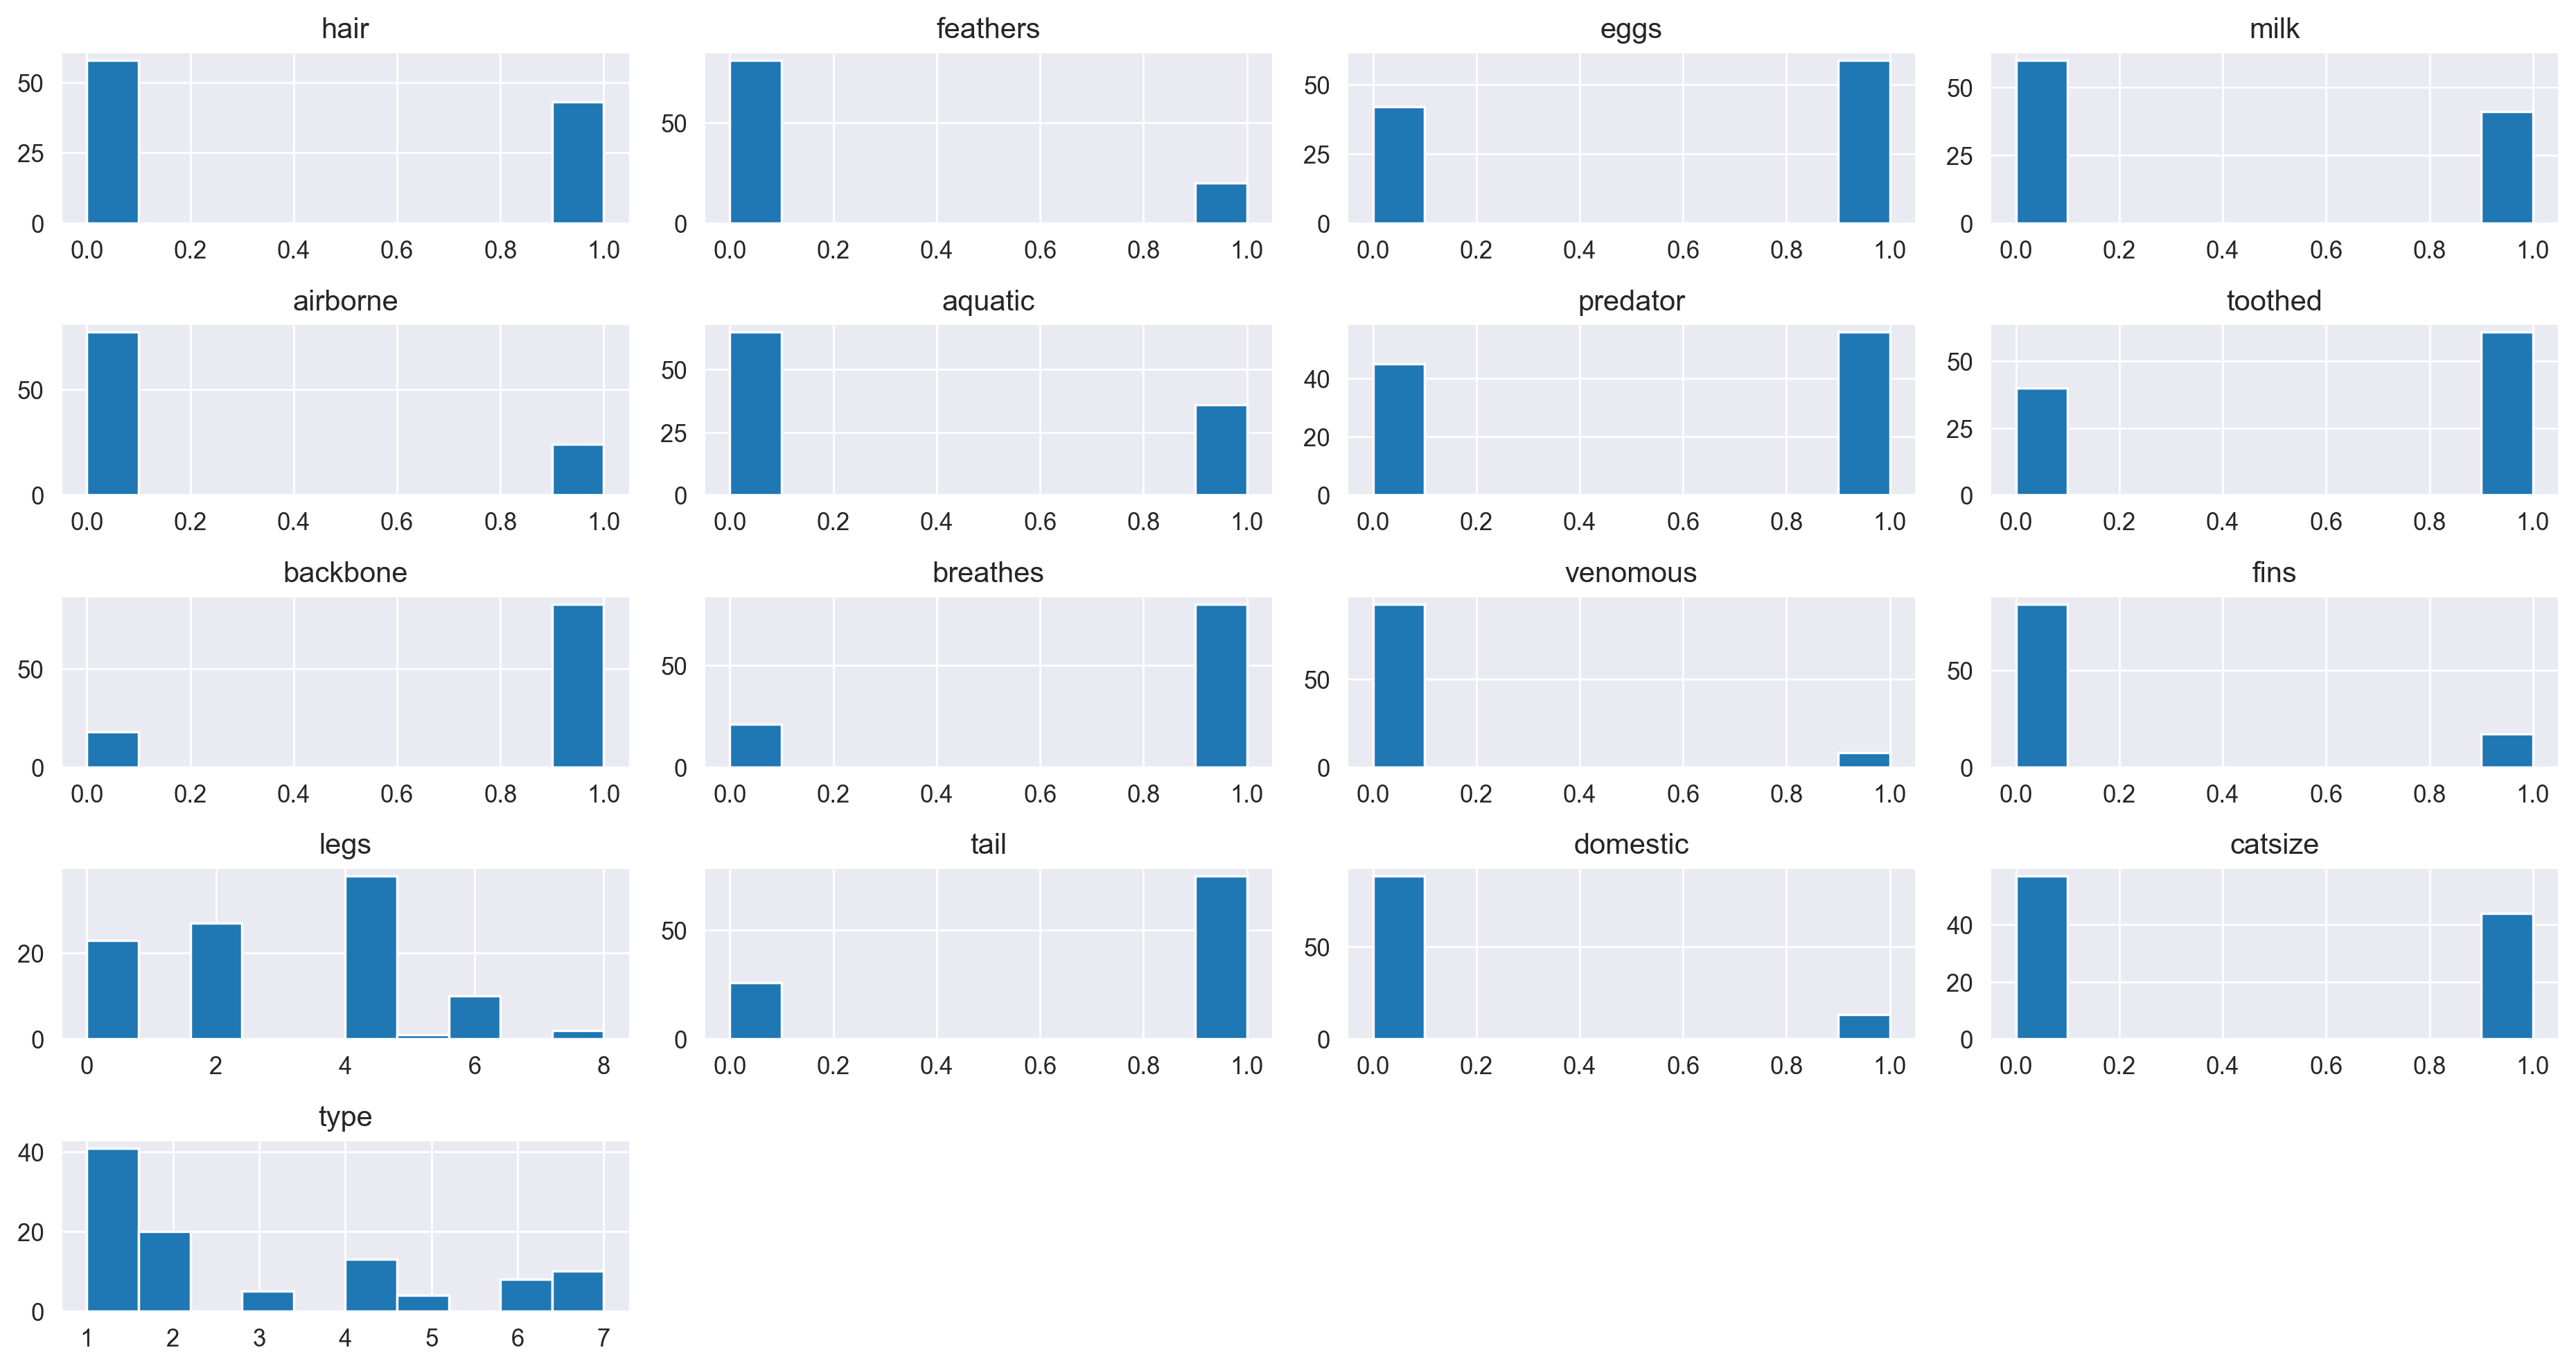

In [8]:
zoo.hist()
plt.tight_layout()

## Correlation Analysis

In [9]:
sns.pairplot(data=zoo)

<Axes: >

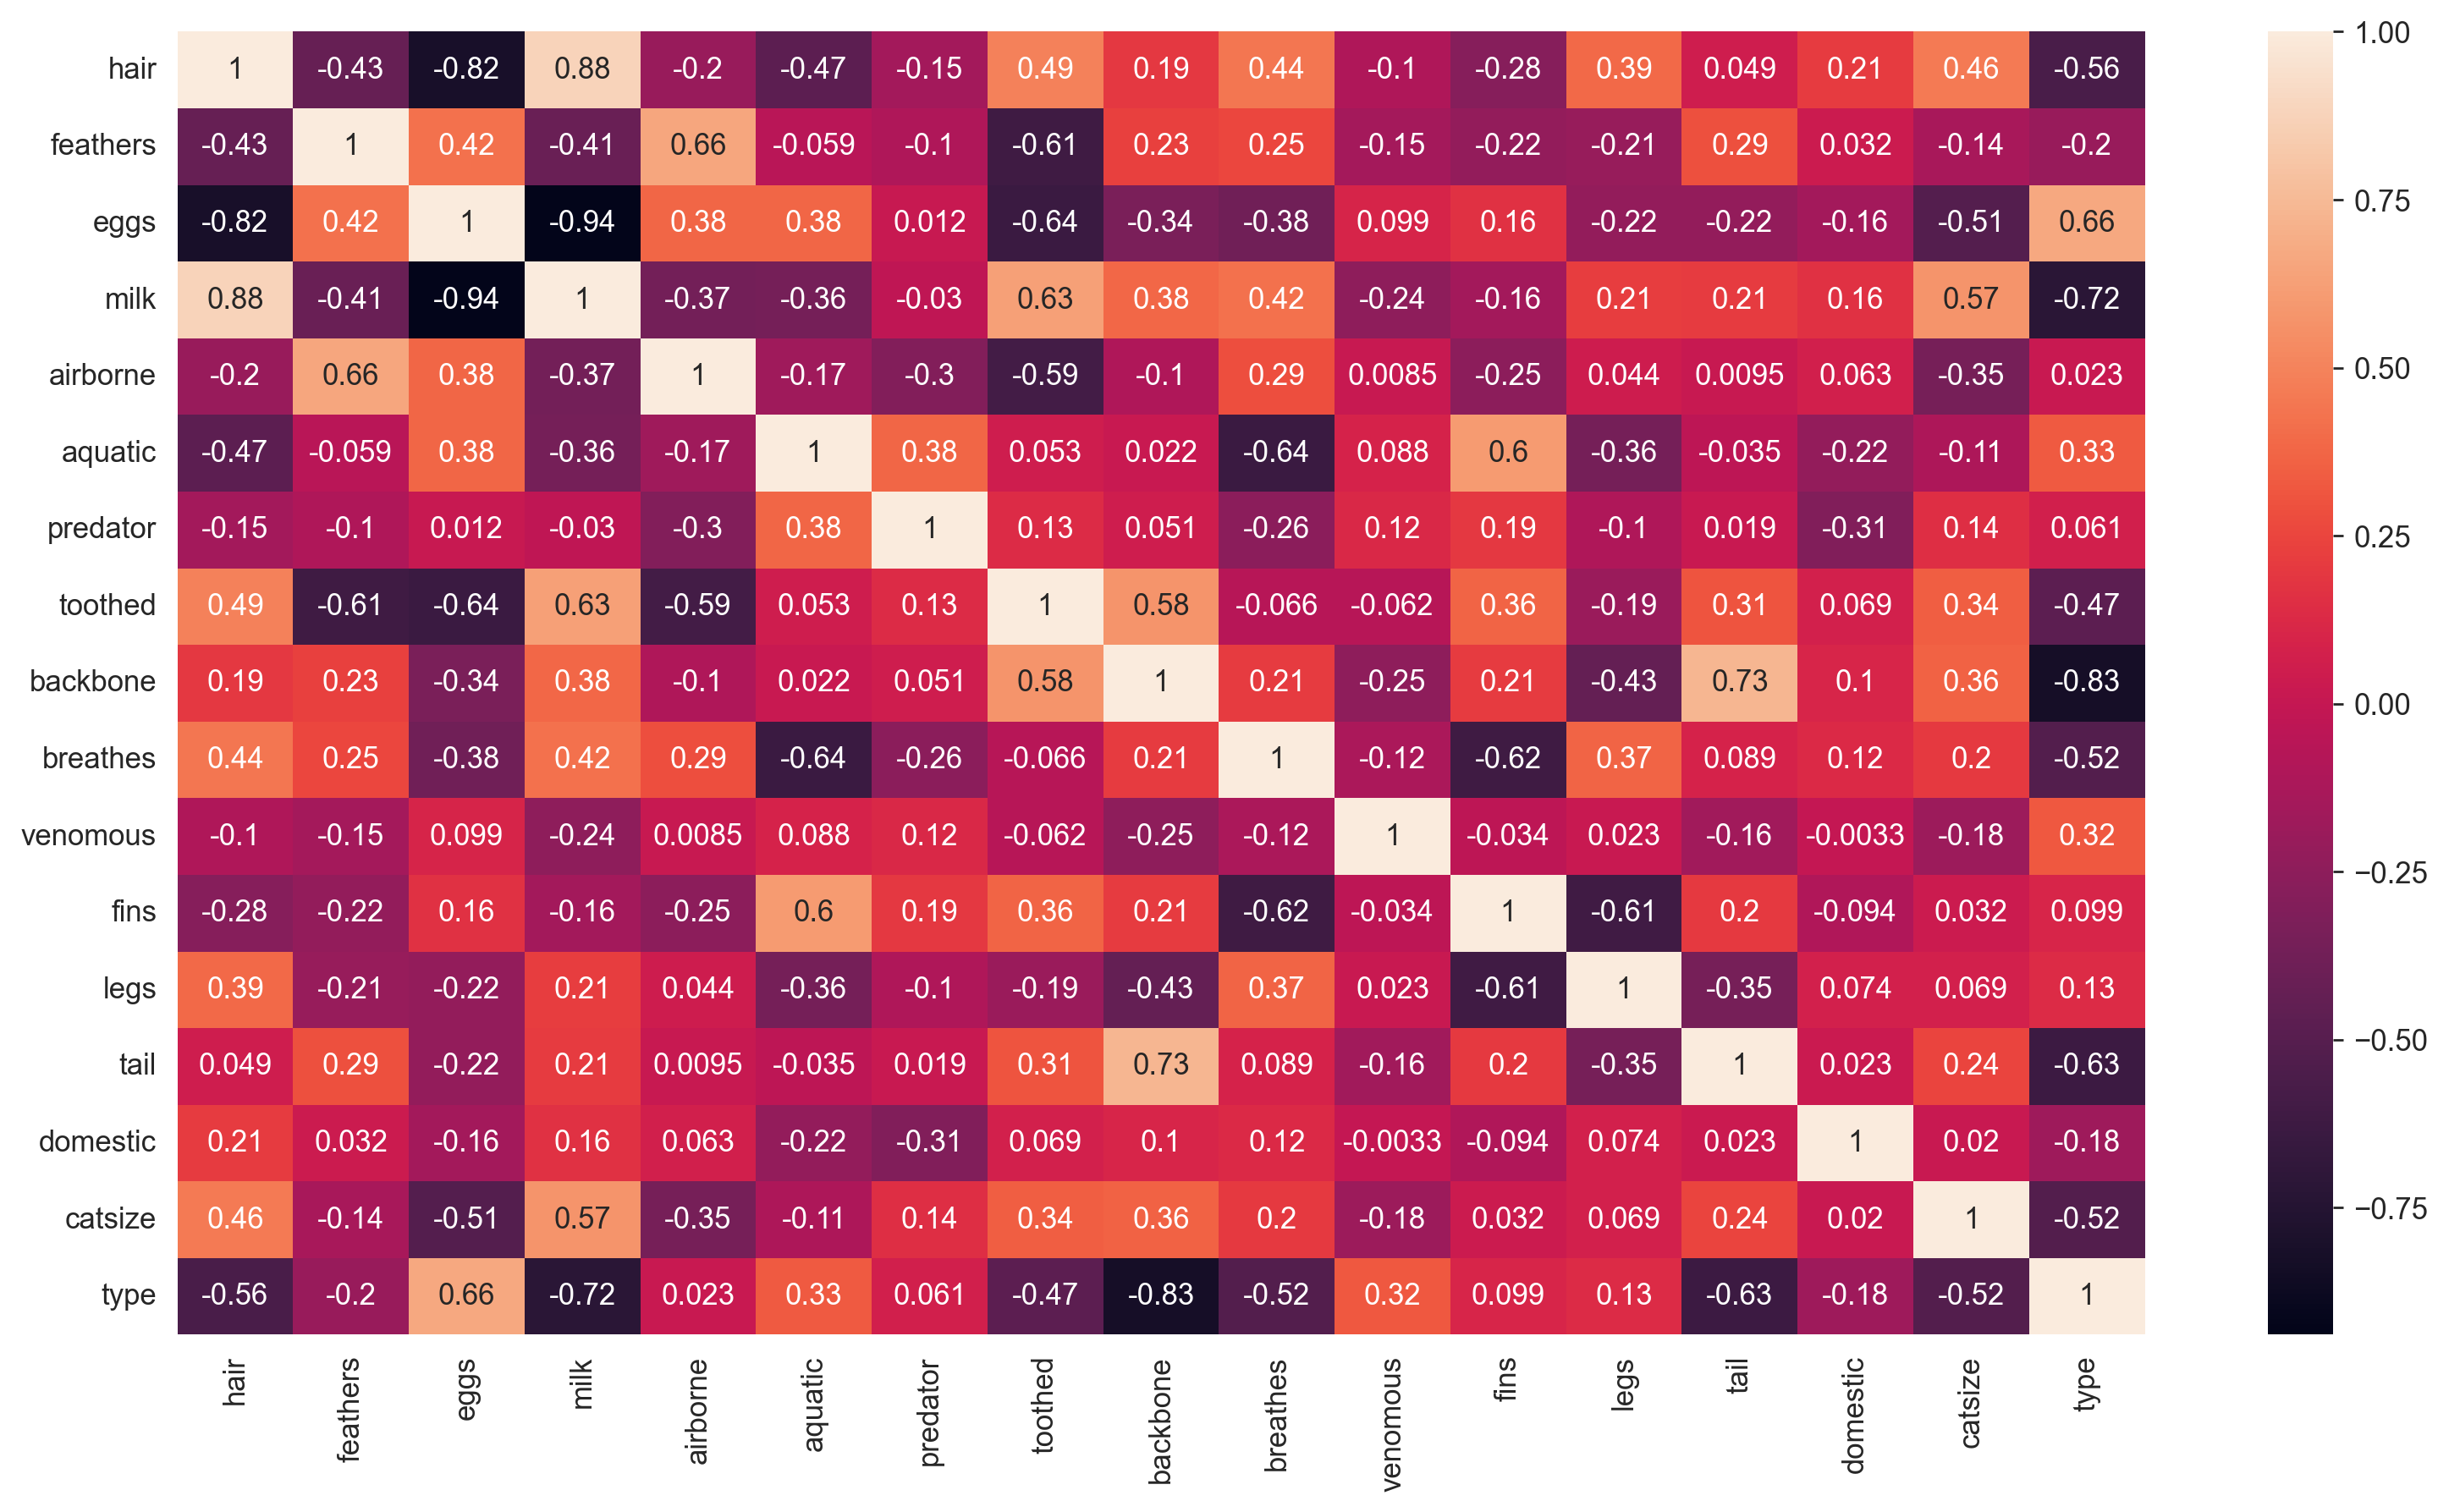

In [14]:
sns.heatmap(zoo.iloc[:, 1:].corr(), annot=True)

In [28]:
def outlier_percentage(df):
    columns = df.columns
    for column in columns:

        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3-q1

        upper = q3 + (iqr*1.5)
        lower = q1 - (iqr*1.5)

        percentage = (((len(df[df[column] > upper])) +
                      (len(df[df[column] < lower])))/len(df[column]))*100

        print(column + ' : ' + str(percentage) + ' %')

In [29]:
outlier_percentage(zoo.iloc[:, 1:])

hair : 0.0 %
feathers : 19.801980198019802 %
eggs : 0.0 %
milk : 0.0 %
airborne : 23.762376237623762 %
aquatic : 0.0 %
predator : 0.0 %
toothed : 0.0 %
backbone : 17.82178217821782 %
breathes : 20.792079207920793 %
venomous : 7.920792079207921 %
fins : 16.831683168316832 %
legs : 1.9801980198019802 %
tail : 0.0 %
domestic : 12.871287128712872 %
catsize : 0.0 %
type : 0.0 %


- Since all these columns having outliers are unique for one type only we maintain them

## Split Data into features and target

In [30]:
X = zoo.iloc[:,1:-1]
y = zoo.iloc[:, -1]

### Train test slit

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)

### Normalize the Data

In [32]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [ ]:
print(X_train.head())
print(X_train.shape)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.259447,-0.561951,0.771845,-0.771845,1.847096,-0.728431,-1.069045,-1.159202,-2.291288,0.520756,-0.204124,-0.479070,1.653618,-1.847096,-0.392232,-0.862662
1,-0.793999,-0.561951,-1.295597,-0.771845,-0.541390,-0.728431,0.935414,-1.159202,-2.291288,0.520756,4.898979,-0.479070,2.649774,0.541390,-0.392232,-0.862662
2,1.259447,-0.561951,-1.295597,1.295597,-0.541390,-0.728431,-1.069045,0.862662,0.436436,0.520756,-0.204124,-0.479070,0.657463,-1.847096,2.549510,-0.862662
3,1.259447,-0.561951,-1.295597,1.295597,-0.541390,-0.728431,-1.069045,0.862662,0.436436,0.520756,-0.204124,-0.479070,-0.338693,0.541390,-0.392232,1.159202
4,-0.793999,1.779513,0.771845,-0.771845,1.847096,-0.728431,-1.069045,-1.159202,0.436436,0.520756,-0.204124,-0.479070,-0.338693,0.541390,2.549510,-0.862662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,-0.793999,-0.561951,0.771845,-0.771845,-0.541390,1.372813,0.935414,0.862662,0.436436,-1.920286,-0.204124,2.087377,-1.334849,0.541390,-0.392232,1.159202
71,-0.793999,1.779513,0.771845,-0.771845,-0.541390,-0.728431,0.935414,-1.159202,0.436436,0.520756,-0.204124,-0.479070,-0.338693,0.541390,-0.392232,1.159202
72,-0.793999,-0.561951,0.771845,-0.771845,-0.541390,1.372813,0.935414,-1.159202,-2.291288,-1.920286,-0.204124,-0.479070,0.657463,-1.847096,-0.392232,-0.862662
73,-0.793999,-0.561951,0.771845,-0.771845,-0.541390,1.372813,0.935414,0.862662,0.436436,-1.920286,-0.204124,2.087377,-1.334849,0.541390,-0.392232,1.159202


In [36]:
print(X_test.head())
print(X_test.shape)

       hair  feathers      eggs      milk  airborne   aquatic  predator  \
0  1.259447 -0.561951 -1.295597  1.295597  -0.54139 -0.728431 -1.069045   
1  1.259447 -0.561951 -1.295597  1.295597  -0.54139 -0.728431 -1.069045   
2 -0.793999 -0.561951 -1.295597  1.295597  -0.54139  1.372813  0.935414   
3  1.259447 -0.561951 -1.295597  1.295597  -0.54139 -0.728431  0.935414   
4  1.259447 -0.561951 -1.295597  1.295597  -0.54139 -0.728431  0.935414   

    toothed  backbone  breathes  venomous      fins      legs     tail  \
0  0.862662  0.436436  0.520756 -0.204124 -0.479070 -0.338693  0.54139   
1  0.862662  0.436436  0.520756 -0.204124 -0.479070  0.657463  0.54139   
2  0.862662  0.436436  0.520756 -0.204124  2.087377 -1.334849  0.54139   
3  0.862662  0.436436  0.520756 -0.204124 -0.479070  0.657463  0.54139   
4  0.862662  0.436436  0.520756 -0.204124 -0.479070  0.657463  0.54139   

   domestic   catsize  
0 -0.392232 -0.862662  
1 -0.392232  1.159202  
2 -0.392232  1.159202  
3 -0.392

## Making the model

In [38]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2

    accuracy                           0.96        26
   macro avg       0.81      0.86      0.83        26
weighted avg       0.94      0.96      0.95        26



In [39]:
print(f'Training Accuracy : {model.score(X_train, y_train)}')
print(f'Testing Accuracy : {model.score(X_test, y_test)}')

Training Accuracy : 0.9466666666666667
Testing Accuracy : 0.9615384615384616


In [40]:
from sklearn.model_selection import cross_val_score

In [ ]:
k_values = range(1, 10)
cv_mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean_scores.append(cv_scores.mean())

# Find best K value
best_k = k_values[np.argmax(cv_mean_scores)]
best_score = max(cv_mean_scores)
print(f"Best K value from CV: {best_k}")

Best K value from CV: 1


In [43]:
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

print(f'Training Accuracy : {model.score(X_train, y_train)}')
print(f'Testing Accuracy : {model.score(X_test, y_test)}')

Training Accuracy : 0.9466666666666667
Testing Accuracy : 0.9615384615384616
